In [1]:
from pynsee import *

import difflib
import geopandas as gpd
import numpy
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

In [2]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
get_dimension_list().to_csv("sirene_dimensions.csv")

Locally saved data has been used
Set update=True to trigger an update
Locally saved legal data has been used
Set update=True to trigger an update

!!! This function may return personal data, please check and
 comply with the legal framework relating to personal data protection !!!


In [4]:
# get activity list
naf5 = get_activity_list('NAF5')
naf5.to_csv("naf.csv")
naf5[naf5["NAF5"].str.contains("^86.2")]

,A10,A129,A17,A21,A38,A5,A64,A88,NAF1,NAF2,NAF3,NAF4,NAF5,TITLE_NAF5_40CH_FR,TITLE_NAF5_65CH_FR,TITLE_NAF5_FR
664,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.21,86.21Z,Activité des médecins généralistes,Activité des médecins généralistes,Activité des médecins généralistes
665,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.22,86.22A,Act. radiodiagnostic et de radiothérapie,Activités de radiodiagnostic et de radiothérapie,Activités de radiodiagnostic et de radiothérapie
666,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.22,86.22B,Activités chirurgicales,Activités chirurgicales,Activités chirurgicales
667,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.22,86.22C,Autre activité des médecins spécialistes,Autres activités des médecins spécialistes,Autres activités des médecins spécialistes
668,OQ,Q86Z,OQ,Q,QA,OQ,QA0,86,Q,86,86.2,86.23,86.23Z,Pratique dentaire,Pratique dentaire,Pratique dentaire


In [5]:
list_dep = ["91", "92", "93", "75", "77", "78", "95"]

# bretagne
list_dep = ["29", "22", "56", "35"]

# PACA
list_dep = ["05", "06", "04", "83", "84", "13"]
list_dep = ["92", "93", "75", "94"]

string_dep = "|".join([dep + "*" for dep in list_dep])
string_dep

'92*|93*|75*|94*'

In [6]:
# search data on doctors

doctors = search_sirene(variable = ["activitePrincipaleEtablissement", "codePostalEtablissement"],
                        pattern = ['86.21Z*', string_dep],
                        number = 100000)
 # '86.21Z' médecin généraliste

doctors = doctors[doctors["activitePrincipaleEtablissement"].str.contains("^86.21Z")].reset_index(drop=True)

In [7]:
doctors.to_csv('doc9192.csv')

In [8]:
# doctors[["categorieJuridiqueUniteLegale", "categorieJuridiqueUniteLegaleLibelle"]].drop_duplicates()

In [9]:
# filter
list_pattern = ["RADIOLOGIE", "IMAGERIE", "GYNECO", "DENTAIRE", "ANESTHES", 'P.M.I', 'INFANTILE', 'CARDIOLOG',
                "MAXILLO", "HOSPITALIER", "OPHTALMO", "DERMATOLOG", 'PLANIFICATION', 'MAIRIE', 'THORACIQUE',
                "TOMODENSITOM", "URGENCE", "NEPHROLOG", "PRAXEA", 'VACCINATION', 'SCOLAIRE', 'CANCER', 'STOMATOLO',
                "URODYNAMIQ", "CARDIORIS", "CHIRPLASTIQUE", "NINAMAX", "CICOF", 'MATERNELLE', 'DIALYSE',
                'RADIOTHERAPIE', 'RHUMATOLOG', 'DENTISTE', 'ECHOGRAPH', 'PATHOLOG', 'CHIRURGIE', 'ESTHETIQ',
                'CYTOLOG', 'ORTHOPED']

pattern = r"|".join(list_pattern)


In [10]:
doctors = doctors[~doctors["denominationUniteLegale"].str.contains(pattern, regex=True, na=False)].reset_index(drop=True)
doctors = doctors[~doctors["enseigne1Etablissement"].str.contains(pattern, regex=True, na=False)].reset_index(drop=True)

# exclude association and administration
doctors = doctors[~doctors["categorieJuridiqueUniteLegale"].isin(["9220", "7220"])].reset_index(drop=True)
doctors = doctors.sort_values(["categorieJuridiqueUniteLegale"])

doctors.to_csv("doctors.csv")
list_denomination_uniteLegale = doctors.denominationUniteLegale.unique()
# list_denomination_uniteLegale                 


In [11]:
# get geographical data list
geodata_list = get_geodata_list()

# get communes geographical limits
com = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:commune')
# get overseas departement to metropolitan France and zoom on ile de france
# com = com.zoom()
# com = com.translate()

# get arrondissement (subdivision of departement) geographical limits
arr = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:arrondissement')
# arr = arr.zoom()
# arr = arr.translate()



Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/2ac583be54e866b2b1b30fb0113c1fd0
Set update=True to get the most up-to-date data
Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/a4f589755961ab3aa6bdff99605334d1
Set update=True to get the most up-to-date data
Previously saved data used
/home/jovyan/.cache/pynsee/pynsee/1b27559c061e4bdaa0bd2966f4605287
Set update=True to get the most up-to-date data


In [32]:
# get arrondissement municipal geographical limits
arrmun = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:arrondissement_municipal')
arrmun = arrmun[arrmun.insee_com.str.contains('^75')].reset_index(drop=True)
arrmun

,id,nom,nom_m,insee_arm,insee_com,population,geometry,bbox,crs
0,ARR_MUNI0000000009736045,Paris 3e Arrondissement,PARIS 3E ARRONDISSEMENT,75103,75056,34020,"(POLYGON ((261619.1098837 6251475.57164147, 26...","[261619.1098837, 6250426.48898676, 263659.1994...",EPSG:3857
1,ARR_MUNI0000000009736047,Paris 1er Arrondissement,PARIS 1ER ARRONDISSEMENT,75101,75056,16093,"(POLYGON ((261003.49604061 6250139.45794355, 2...","[258365.1323303, 6250139.45794355, 261707.1255...",EPSG:3857
2,ARR_MUNI0000000009736046,Paris 2e Arrondissement,PARIS 2E ARRONDISSEMENT,75102,75056,21420,"(POLYGON ((261369.06158887 6252948.2424698, 26...","[259151.70471408, 6251715.22210324, 262074.208...",EPSG:3857
3,ARR_MUNI0000000009736545,Paris 4e Arrondissement,PARIS 4E ARRONDISSEMENT,75104,75056,28763,"(POLYGON ((263659.19945403 6250429.87402374, 2...","[261003.49604061, 6248802.54683736, 263729.664...",EPSG:3857
4,ARR_MUNI0000000009736544,Paris 5e Arrondissement,PARIS 5E ARRONDISSEMENT,75105,75056,58379,"(POLYGON ((260115.46645766 6247700.59244701, 2...","[260115.46645766, 6247215.77630544, 263391.680...",EPSG:3857
5,ARR_MUNI0000000009736543,Paris 6e Arrondissement,PARIS 6E ARRONDISSEMENT,75106,75056,40525,"(POLYGON ((259699.01793307 6251027.18277494, 2...","[257895.26163876, 6247700.59244701, 261003.496...",EPSG:3857
6,ARR_MUNI0000000009736542,Paris 7e Arrondissement,PARIS 7E ARRONDISSEMENT,75107,75056,50196,"(POLYGON ((256228.2227937 6251731.19427178, 25...","[254887.75750015, 6248761.52114551, 259738.438...",EPSG:3857
7,ARR_MUNI0000000009736044,Paris 8e Arrondissement,PARIS 8E ARRONDISSEMENT,75108,75056,36222,"(POLYGON ((259058.79222059 6255109.24761038, 2...","[255481.80130864, 6251650.51019204, 259058.792...",EPSG:3857
8,ARR_MUNI0000000009736043,Paris 9e Arrondissement,PARIS 9E ARRONDISSEMENT,75109,75056,59835,"(POLYGON ((258916.6696545 6252760.16438741, 25...","[258916.6696545, 6252760.16438741, 261584.3895...",EPSG:3857
9,ARR_MUNI0000000009736042,Paris 10e Arrondissement,PARIS 10E ARRONDISSEMENT,75110,75056,88557,"(POLYGON ((263238.71071961 6255263.48300702, 2...","[261367.1510992, 6252411.50458392, 264595.8281...",EPSG:3857


In [13]:
def _replace_nan(x, y):
    if (x is None) or (numpy.isnan(x)):
        return y
    else:
        return x

In [14]:
doctors

,siren,nic,siret,dateDebut,dateCreationEtablissement,dateCreationUniteLegale,dateFin,denominationUniteLegale,nomUniteLegale,prenomUsuelUniteLegale,...,libellePaysEtrangerEtablissement,complementAdresse2Etablissement,indiceRepetition2Etablissement,libelleCommuneEtranger2Etablissement,distributionSpeciale2Etablissement,codeCedex2Etablissement,libelleCedex2Etablissement,codePaysEtranger2Etablissement,libellePaysEtranger2Etablissement,enseigne3Etablissement
4983,429862956,00043,42986295600043,2013-06-02,2007-10-01,2000-01-03,None,None,ADDA,JEAN,...,None,None,None,None,None,None,None,None,None,None
5819,478580186,00037,47858018600037,2020-03-01,2013-03-25,2003-11-03,None,None,BILLOTTE,HELOISE,...,None,None,None,None,None,None,None,None,None,None
5818,478574171,00029,47857417100029,2008-01-01,1999-11-25,1998-01-08,None,None,GUICHARD,RENAUD,...,None,None,None,None,None,None,None,None,None,None
9532,890423114,00028,89042311400028,2021-07-20,2021-07-20,2019-07-05,None,None,HACMOUN,JEREMIE,...,None,None,None,None,None,None,None,None,None,None
5816,478477433,00054,47847743300054,2010-03-22,2010-03-22,2003-10-07,None,None,MUSSARD,PHILIPPE,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,775663883,00020,77566388300020,2008-01-01,1900-01-01,1900-01-01,None,INSTITUT ARTHUR VERNES,None,None,...,None,None,None,None,None,None,None,None,None,None
290,313711038,00015,31371103800015,2008-01-01,1978-01-01,1978-01-01,None,FONDATION HAHNEMANN,None,None,...,None,None,None,None,None,None,None,None,None,None
7208,775683006,00362,77568300600362,2017-06-21,2017-06-21,1900-01-01,None,FONDATION SANTE DES ETUDIANTS DE FRANCE,None,None,...,None,None,None,None,None,None,None,None,None,None
225,310227749,00010,31022774900010,2008-01-01,1900-01-01,1900-01-01,None,CENTRE DE SOINS,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
# count general practioners by commun
hdLegalStatus = doctors.groupby(['categorieJuridiqueUniteLegale'], dropna=True)['effectifsMinEtablissement'].agg(['mean', "count"])
   
hdLegalStatus["meanHeadcountLegalStatus"] = hdLegalStatus["mean"].apply(lambda x: _replace_nan(x, 1))

hdLegalStatus["categorieJuridiqueUniteLegale"] = hdLegalStatus.index
hdLegalStatus.loc[hdLegalStatus["categorieJuridiqueUniteLegale"] == "1000", "meanHeadcountLegalStatus"] = 1
hdLegalStatus = hdLegalStatus.reset_index(drop=True)

doctors = doctors.merge(hdLegalStatus, how = "left", on = "categorieJuridiqueUniteLegale").reset_index(drop=True)

for r in doctors.index:
    hdMin = doctors.loc[r, "effectifsMinEtablissement"]
    if (hdMin is None) or (numpy.isnan(hdMin)):
        doctors.loc[r, "headcount"] = doctors.loc[r, "meanHeadcountLegalStatus"]
    else:
        doctors.loc[r, "headcount"] = hdMin


In [16]:
# duplicates cleaning
# normalization to avoid double counting
doctors["headcountFinal"] = doctors["headcount"] / doctors.groupby("siren", dropna=True)["headcount"].transform("sum")

#visual check duplicates
dupDoctors = doctors[doctors["siren"].duplicated(keep=False)].reset_index(drop=True)
dupDoctors.to_csv("dupDoctors.csv")

list_adress_var = ["numeroVoieEtablissement", "typeVoieEtablissementLibelle", 
                   "libelleVoieEtablissement", "codePostalEtablissement", "libelleCommuneEtablissement"]

addressDupDoctors = doctors[doctors[list_adress_var].duplicated(keep=False)].reset_index(drop=True)
addressDupDoctors = addressDupDoctors.sort_values(list_adress_var)
addressDupDoctors.to_csv("addressDupDoctors.csv")

In [17]:
doctors.sort_values(["libelleCommuneEtablissement"]).to_csv("doctorSortedCom.csv")

In [18]:
# count general practioners by commun

doctorsCom = doctors.groupby(['libelleCommuneEtablissement', 'codePostalEtablissement'])['headcountFinal'].agg(['sum'])
doctorsCom = doctorsCom.rename(columns = {"sum" : "headcount"})
doctorsCom

,,headcount
libelleCommuneEtablissement,codePostalEtablissement,
ABLON-SUR-SEINE,94480,2.500000
ALFORTVILLE,94140,30.250000
ANTONY,92160,129.890841
ARCUEIL,94110,13.500000
ASNIERES-SUR-SEINE,92600,68.250000
...,...,...
VILLEPINTE,93420,31.000000
VILLETANEUSE,93430,7.000000
VILLIERS-SUR-MARNE,94350,13.000000


In [19]:
doctorsCom["libelleCommuneEtablissement"] = doctorsCom.index.get_level_values("libelleCommuneEtablissement")
doctorsCom["codePostalEtablissement"] = doctorsCom.index.get_level_values("codePostalEtablissement")
doctorsCom = doctorsCom.reset_index(drop=True)

In [20]:
import os, sys 

communes = get_geo_list("communes")

def _find_commune_identifier(com, dep, communes=communes):
    
    try:
        list_com = [c.upper() for c in communes.TITLE.to_list()]    
        communes["TITLE"] = list_com    
        communes = communes[communes["CODE_DEP"] == dep].reset_index(drop=True)

        match = difflib.get_close_matches(com.upper(), list_com)[0]

        cog = communes[communes["TITLE"] == match].reset_index(drop=True)
        cog = cog.loc[0, "CODE"]
    except:
        cog = None
    
    return cog      
    
# _find_commune_identifier("igny", "91")

#doctorsCom["insee_com"] = doctorsCom["libelleCommuneEtablissement"].apply(lambda x: _find_commune_identifier(x, "91"))

for r in doctorsCom.index:
    dep = doctorsCom.loc[r, "codePostalEtablissement"][:2]
    comName = doctorsCom.loc[r, "libelleCommuneEtablissement"]
    doctorsCom.loc[r, "insee_com"] = _find_commune_identifier(comName, dep)


Locally saved data has been used
Set update=True to trigger an update


In [36]:
difflib.get_close_matches('PARIS 2', ['PARIS 1ER', 'PARIS 2EME'])

['PARIS 2EME', 'PARIS 1ER']

In [21]:
doctorsCom

,headcount,libelleCommuneEtablissement,codePostalEtablissement,insee_com
0,2.500000,ABLON-SUR-SEINE,94480,94001
1,30.250000,ALFORTVILLE,94140,94002
2,129.890841,ANTONY,92160,92002
3,13.500000,ARCUEIL,94110,94003
4,68.250000,ASNIERES-SUR-SEINE,92600,92004
...,...,...,...,...
142,31.000000,VILLEPINTE,93420,93078
143,7.000000,VILLETANEUSE,93430,93079
144,13.000000,VILLIERS-SUR-MARNE,94350,94079
145,71.733780,VINCENNES,94300,94080


In [ ]:
doctorsCom[doctorsCom.codePostalEtablissement.str.contains('^75')]

,headcount,libelleCommuneEtablissement,codePostalEtablissement,insee_com
86,74.042156,PARIS 1,75001,75056
87,141.316616,PARIS 10,75010,75056
88,286.047884,PARIS 11,75011,75056
89,267.082289,PARIS 12,75012,75056
90,426.092818,PARIS 13,75013,75056
91,278.687215,PARIS 14,75014,75056
92,423.540402,PARIS 15,75015,75056
93,196.892124,PARIS 16,75016,75056
94,378.812940,PARIS 16,75116,75056
95,384.333254,PARIS 17,75017,75056


In [33]:
comDep

,id,nom,nom_m,insee_com,statut,population,insee_can,insee_arr,insee_dep,insee_reg,siren_epci,geometry,bbox,crs
0,COMMUNE_0000000009735522,Colombes,COLOMBES,92025,Commune simple,86052,97,2,92,11,200054781/200057990,"(POLYGON ((247173.58994914 6261401.87109554, 2...","[247173.58994914, 6258931.16397146, 253064.812...",EPSG:3857
1,COMMUNE_0000000009736039,Asnières-sur-Seine,ASNIERES-SUR-SEINE,92004,Commune simple,85946,95,2,92,11,200054781/200057990,"(POLYGON ((258241.02777986 6260609.75698045, 2...","[252132.37422385, 6258297.54309835, 258485.562...",EPSG:3857
2,COMMUNE_0000000009735517,Gennevilliers,GENNEVILLIERS,92036,Commune simple,47702,14,2,92,11,200054781/200057990,"(POLYGON ((255029.55700245 6266545.41898515, 2...","[250197.36614862, 6260062.50423666, 259201.831...",EPSG:3857
3,COMMUNE_0000000009736037,Levallois-Perret,LEVALLOIS-PERRET,92044,Commune simple,65817,16,2,92,11,200054781/200057982,"(POLYGON ((254631.61631127 6258527.16290927, 2...","[252813.68381122, 6255479.00284425, 256454.988...",EPSG:3857
4,COMMUNE_0000000009736038,Clichy,CLICHY,92024,Commune simple,62485,09,2,92,11,200054781/200057990,"(POLYGON ((256454.98891958 6256920.55141938, 2...","[254631.61631127, 6256920.55141938, 258355.981...",EPSG:3857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,COMMUNE_0000000009736533,Le Kremlin-Bicêtre,LE KREMLIN-BICETRE,94043,Commune simple,24850,12,3,94,11,200054781/200058014,"(POLYGON ((261357.24536885 6241251.94850031, 2...","[260918.33492004, 6241175.37480611, 263627.318...",EPSG:3857
120,COMMUNE_0000000009736537,Montrouge,MONTROUGE,92049,Commune simple,48734,18,1,92,11,200054781/200057966,"(POLYGON ((256334.18236861 6242873.04115206, 2...","[256045.70312901, 6242612.74718816, 259648.375...",EPSG:3857
121,COMMUNE_0000000009736015,Coubron,COUBRON,93015,Commune simple,4866,20,2,93,11,200054781/200058790,"(POLYGON ((284891.89847244 6261518.84085998, 2...","[284884.06353447, 6259009.74017576, 288606.855...",EPSG:3857
122,COMMUNE_0000000009737462,Mandres-les-Roses,MANDRES-LES-ROSES,94047,Commune simple,4766,16,1,94,11,200054781/200058006,"(POLYGON ((281286.43232851 6224900.13275815, 2...","[281286.43232851, 6223625.41764668, 285943.129...",EPSG:3857


In [23]:
comDep = com[com["insee_dep" ].isin(list_dep)].reset_index(drop=True)
doctorsCom2 = comDep.merge(doctorsCom, how = "left", on = "insee_com")
doctorsCom2.to_csv("doctorsDep.csv")

In [ ]:
doctorsCom75 = doctorsCom[doctorsCom.codePostalEtablissement.str.contains('^75')].reset_index(drop=True)



In [24]:
doctorsCom2["headcount"] = doctorsCom2["headcount"].apply(lambda x: _replace_nan(x, 0))

doctorsCom3 = doctorsCom2.copy().groupby(["insee_arr"])[["population", "headcount"]].agg(["sum"])
doctorsCom3["ratio"] = 1000 * doctorsCom3["headcount"] / doctorsCom3["population"]
doctorsCom3["insee_arr"] = doctorsCom3.index
doctorsCom3 = doctorsCom3.reset_index(drop=True)

arrDep = arr[arr["insee_dep"].isin(list_dep)].reset_index(drop=True)
doctorsCom3 = doctorsCom3.merge(arrDep[["insee_arr", "geometry"]], how= "left", on = "insee_arr")
doctorsCom3 = doctorsCom3.rename(columns = {"('ratio','')" : "ratio"})
doctorsCom3.columns = ["insee_arr", "population", "headcount", "ratio", "insee_arr2", "geometry"]
doctorsCom3

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,insee_arr,population,headcount,ratio,insee_arr2,geometry
0,1,46834897,5888.442943,0.125728,1,"(POLYGON ((263182.01671144 6243765.25756816, 2..."
1,1,46834897,5888.442943,0.125728,1,"(POLYGON ((253606.20819294 6243401.87012695, 2..."
2,1,46834897,5888.442943,0.125728,1,"(POLYGON ((268294.30642005 6260725.57658092, 2..."
3,1,46834897,5888.442943,0.125728,1,"(POLYGON ((274756.07552845 6234636.82506559, 2..."
4,2,2246558,2261.971172,1.006861,2,"(POLYGON ((257333.71590756 6266034.02326214, 2..."
5,2,2246558,2261.971172,1.006861,2,"(POLYGON ((269682.75207329 6263000.03822616, 2..."
6,2,2246558,2261.971172,1.006861,2,"(POLYGON ((274660.73949029 6247603.89525789, 2..."
7,3,1488013,1181.585886,0.794070,3,"(POLYGON ((261986.67429495 6269030.48798274, 2..."
8,3,1488013,1181.585886,0.794070,3,"(POLYGON ((244839.79110686 6246028.73805181, 2..."
9,3,1488013,1181.585886,0.794070,3,"(POLYGON ((259270.13582655 6243323.18954607, 2..."


In [25]:
doctorsCom2["headcount"] = doctorsCom2["headcount"].apply(lambda x: _replace_nan(x, 0))
doctorsCom2["ratio"] = 1000 * doctorsCom2["headcount"] / doctorsCom2["population"]
doctorsCom2.loc[doctorsCom2["nom_m"] == "CHEVANNES", "ratio"] = 2
doctorsCom2.sort_values(["ratio"], ascending=False)

,id,nom,nom_m,insee_com,statut,population,insee_can,insee_arr,insee_dep,insee_reg,siren_epci,geometry,bbox,crs,headcount,libelleCommuneEtablissement,codePostalEtablissement,ratio
119,COMMUNE_0000000009736051,Neuilly-sur-Seine,NEUILLY-SUR-SEINE,92051,Commune simple,59940,21,2,92,11,200054781/200057982,"(POLYGON ((249990.60219783 6253925.04904169, 2...","[249990.60219783, 6253522.49976625, 254313.628...",EPSG:3857,184.079973,NEUILLY-SUR-SEINE,92200,3.071071
61,COMMUNE_0000000009737023,Antony,ANTONY,92002,Sous-préfecture,62858,01,1,92,11,200054781/200057966,"(POLYGON ((257415.08058304 6236285.88462852, 2...","[253202.09284666, 6229062.51221025, 258341.448...",EPSG:3857,129.890841,ANTONY,92160,2.066417
95,COMMUNE_0000000009737021,Bourg-la-Reine,BOURG-LA-REINE,92014,Commune simple,20769,03,1,92,11,200054781/200057966,"(POLYGON ((258252.35909707 6236048.26654407, 2...","[256797.54963353, 6236048.26654407, 258997.771...",EPSG:3857,42.900682,BOURG-LA-REINE,92340,2.065611
30,COMMUNE_0000000009736019,Le Raincy,LE RAINCY,93062,Sous-préfecture,14708,21,2,93,11,200054781/200058790,"(POLYGON ((279527.00782477 6258221.40829595, 2...","[279036.41624654, 6255847.54029023, 281925.110...",EPSG:3857,29.833333,LE RAINCY,93340,2.028375
125,COMMUNE_0000000009736552,Boulogne-Billancourt,BOULOGNE-BILLANCOURT,92012,Sous-préfecture,121334,96,3,92,11,200054781/200057974,"(POLYGON ((248922.32031197 6244635.98353175, 2...","[247456.32999117, 6244623.66890458, 251892.800...",EPSG:3857,210.421439,BOULOGNE-BILLANCOURT,92100,1.734233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,COMMUNE_0000000009736048,Paris,PARIS,75056,Capitale d'état,2175601,NR,1,75,11,200054781,"(POLYGON ((263182.01671144 6243765.25756816, 2...","[247598.93827928, 6243623.91277531, 274942.563...",EPSG:3857,72.105729,PARIS 3,75003,0.033143
17,COMMUNE_0000000009736048,Paris,PARIS,75056,Capitale d'état,2175601,NR,1,75,11,200054781,"(POLYGON ((263182.01671144 6243765.25756816, 2...","[247598.93827928, 6243623.91277531, 274942.563...",EPSG:3857,58.166667,PARIS 2,75002,0.026736
137,COMMUNE_0000000009735515,Saint-Denis,SAINT-DENIS,93066,Sous-préfecture,112091,99,3,93,11,200054781/200057867,"(POLYGON ((261157.63614221 6265768.77794315, 2...","[259735.78147084, 6258161.94425116, 266961.846...",EPSG:3857,2.250000,SAINT-DENIS,93210,0.020073
71,COMMUNE_0000000009737460,Périgny,PERIGNY,94056,Commune simple,2672,16,1,94,11,200054781/200058006,"(POLYGON ((285943.12996008 6225329.10443645, 2...","[283019.29810232, 6222024.12058386, 287375.905...",EPSG:3857,0.000000,NaN,NaN,0.000000


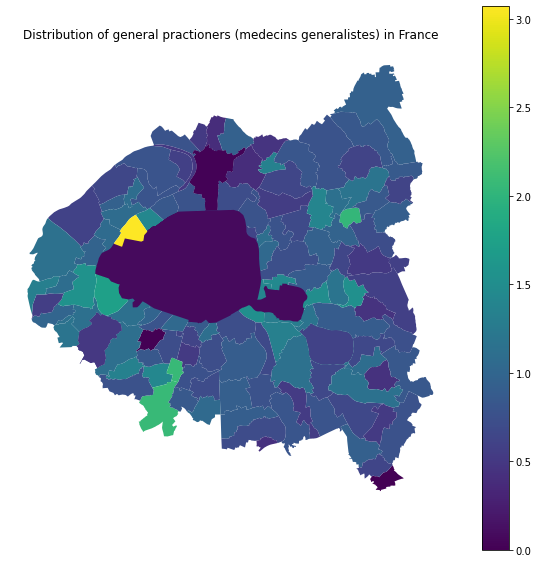

In [26]:
doctorsCom2Map = gpd.GeoDataFrame(doctorsCom2)

fig, ax = plt.subplots(1,1,figsize=[10,10])
doctorsCom2Map.plot(column='ratio', cmap=cm.viridis,
    legend=True, ax=ax)
ax.set_axis_off()
ax.set(title='Distribution of general practioners (medecins generalistes) in France')
plt.show()


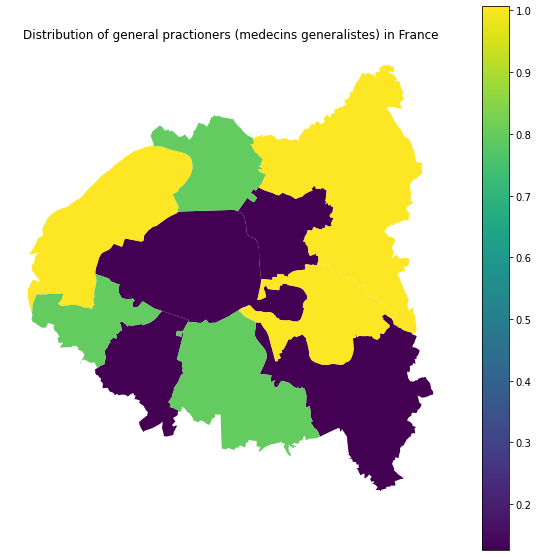

In [27]:
doctorsCom3Map = gpd.GeoDataFrame(doctorsCom3)

fig, ax = plt.subplots(1,1,figsize=[10,10])
doctorsCom3Map.plot(column='ratio', cmap=cm.viridis,
    legend=True, ax=ax)
ax.set_axis_off()
ax.set(title='Distribution of general practioners (medecins generalistes) in France')
plt.show()

In [28]:
import time
time.sleep(10)

In [37]:
from pynsee import *
init_conn('xuFzoDuUfPWy4xhgqwiA7Pb8Zwca', 'vtDF5XXnV9Y1rSjIMs57ZkoA0Gwa')

Token has been created
Subscription to all INSEE's APIs has been successfull
Unless the user wants to change key or secret,
using this function is no longer needed as the token has been saved locally here:
/home/jovyan/pynsee_credentials.yml


In [38]:
df = get_dataset_list()
df

Getting datasets list: 100%|██████████| 198/198 [00:00<00:00, 838.65it/s]


,id,Name.fr,Name.en,url,n_series
0,BALANCE-PAIEMENTS,Balance des paiements,Balance of payments,https://www.insee.fr/fr/statistiques/series/10...,197
1,CHOMAGE-TRIM-NATIONAL,"Chômage, taux de chômage par sexe et âge (sens...","Unemployment, unemployment rate and halo by se...",https://www.insee.fr/fr/statistiques/series/10...,169
2,CLIMAT-AFFAIRES,Indicateurs synthétiques du climat des affaires,Business climate composite indicators,https://www.insee.fr/fr/statistiques/series/10...,3
3,CNA-2010-CONSO-MEN,Consommation des ménages - Résultats par produ...,"Households' consumption - Results by product, ...",https://www.insee.fr/fr/statistiques/series/10...,2247
4,CNA-2010-CONSO-SI,Dépenses de consommation finale par secteur in...,Final consumption expenditure by institutional...,https://www.insee.fr/fr/statistiques/series/10...,1391
...,...,...,...,...,...
192,TCRED-TRAVAIL-EMPLOI-EFF-FPT,TCRED - Effectifs de la fonction publique terr...,Local civil service headcount,https://www.insee.fr/fr/statistiques/series/10...,351
193,TCRED-TRAVAIL-EMPLOI-TCHOMA-SA,TCRED - Taux de chômage localisés par sexe et ...,"Localised unemployment rates by gender, on ann...",https://www.insee.fr/fr/statistiques/series/10...,702
194,TOURISME-FRANCE-METHODE-REDRESSEMENT-2019,"Fréquentation touristique (nuitées, arrivées)",Tourism occupancy (overnight stays and arrivals),https://www.insee.fr/fr/statistiques/series/11...,3545
195,TRANSPORTS,"Transports de marchandises, voyageurs et autre...","Freight, passengers and other transportation i...",https://www.insee.fr/fr/statistiques/series/10...,97
